## Illustrating Bagging by fitting various different fifth order polynomials

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
%matplotlib inline

### (a)

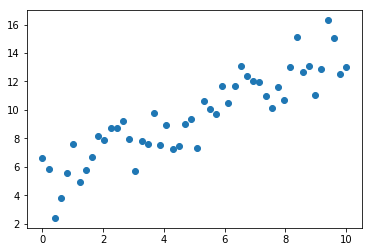

In [19]:
x = np.linspace(0, 10, 50)
y = x + 2 + 5*np.random.rand(50)
plt.scatter(x,y)

### (b)
### Initial polynomial fit without bagging

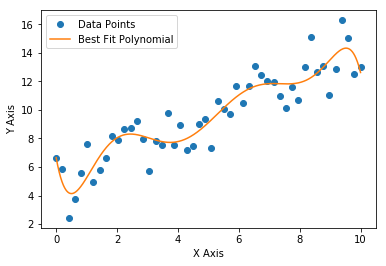

In [20]:
p = np.poly1d(np.polyfit(x, y, 8))
t = np.linspace(0, 10, 2000)
plt.plot(x, y, 'o',label='Data Points')
plt.plot(t,p(t),'-',label='Best Fit Polynomial')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()

### Bagging Step - Take a subset of <i>j</i> points, fit a curve and take 50 such polynomial fits. 
Here, $11 \leq j \leq 50$, since we need atleast 6 points to fit a polynomial of degree 5.

In [21]:
poly_to_fit = []
poly = []
for i in range(100):
    temp = rd.sample(set([i for i in range(50)]),25)
    x_ = [x[i] for i in temp]
    y_ = [y[i] for i in temp]
    p_ = np.poly1d(np.polyfit(x_, y_, 8))
    t_ = np.linspace(0, 10, 200)
    poly_to_fit.append(p_(t_))
    poly.append(p_)
final = np.zeros(len(poly_to_fit[0]))
for i in poly_to_fit:
    final+=i
final = final/len(poly_to_fit)

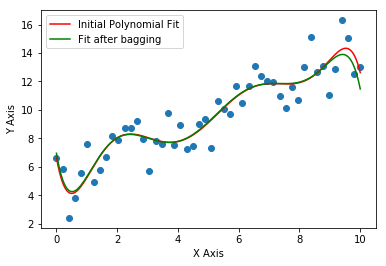

In [22]:
t = np.linspace(0,10,200)
p = np.poly1d(np.polyfit(x, y, 8))
plt.scatter(x,y)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.plot(t,p(t), label = 'Initial Polynomial Fit',c='r')
plt.plot(t_,final, label = 'Fit after bagging',c='g')
plt.legend()

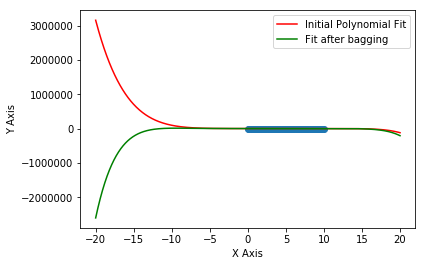

In [23]:
poly_to_fit = []
poly = []
for i in range(100):
    temp = rd.sample(set([i for i in range(50)]),25)
    x_ = [x[i] for i in temp]
    y_ = [y[i] for i in temp]
    p_ = np.poly1d(np.polyfit(x_, y_, 8))
    t_ = np.linspace(-20, 20, 800)
    poly_to_fit.append(p_(t_))
    poly.append(p_)
final = np.zeros(len(poly_to_fit[0]))
for i in poly_to_fit:
    final+=i
final = final/len(poly_to_fit)

t = np.linspace(-20,20,800)
p = np.poly1d(np.polyfit(x, y, 8))
plt.scatter(x,y)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.plot(t,p(t), label = 'Initial Polynomial Fit',c='r')
plt.plot(t_,final, label = 'Fit after bagging',c='g')
plt.legend()

As can be seen from the above plot, the  variance seems to be *lower* for the bagged case, and that is  what we would expect. The line will be negative for negative values of z beyond the intercept. Though, this time the varaince seems to be lower for the bagged curve, in general, we cannot really be very sure, at least from the experiments that I could conduct. It depends a lot on the sample that is chosen. Choosing outliers continuously might result in indeed a very poor plot.